In [1]:
import pandas as pd
import os
import ast
import numpy as np
import pickle
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
import seaborn as sns

In [2]:
path = 'C:/Users/HEN1/Projects/YELP_DATASET/DATA'
file_name = 'yelp_str.pkl'
file = os.path.join(path, file_name)
with open(file, 'rb') as file:
    yelp_str=pickle.load(file)

In [130]:
path = 'C:/Users/HEN1/Projects/YELP_DATASET/DATA'
file_name = 'yelp.pkl'
file = os.path.join(path, file_name)
with open(file, 'rb') as file:
    yelp=pickle.load(file)

In [50]:
path = 'C:/Users/HEN1/Projects/YELP_DATASET/DATA'
file_name = 'fe_col.pkl'
file = os.path.join(path, file_name)
with open(file, 'rb') as file:
    fe=pickle.load(file)

In [63]:
yelp_str[yelp_str['review_count']<10].shape[0]

10352

In [64]:
yelp_str.head()

new_user_id  useful  cool  user_review_count  funny  review_count  \
16        70136      68    19                 39     38           225   
17        18046     118    21                 70     26           849   
22       135310      34    18                 68     10           436   
40        67060       2     0                  2      0           270   
47       165546       6     1                 12      1          2302   

    new_business_id is_elite  business_stars DogsAllowed_False  ...  Bakeries  \
16              988        0             3.5                 0  ...         0   
17             4629        0             4.0                 1  ...         1   
22              767        0             4.5                 1  ...         0   
40             1727        0             3.5                 0  ...         0   
47             1639        0             4.0                 1  ...         0   

   is_open RestaurantsAttire_dressy Cafes dinner_True casual_False  \
16       0                        0     0           1            0   
17       1                        0     0           0            1   
22       1                        0     0           1            0   
40       1                        0     0           1            0   
47       1                        0     0           0            0   

   RestaurantsPriceRange2_4.0   longitude   latitude stars  
16                          0 -123.069730  49.272800     5  
17                          0 -123.122629  49.284877     1  
22                          0 -123.128934  49.287496     5  
40                          0 -123.155283  49.270973     1  
47                          0 -123.117036  49.280443     3  

[5 rows x 53 columns]

In [3]:
trans_label = {1:0, 2:1, 3:2, 4:3, 5:4}
yelp_str['stars'] = yelp_str['stars'].map(trans_label)

In [145]:
yelp_str = yelp_str.loc[:,yelp_str.apply(pd.Series.nunique) != 1]

In [4]:
for col in yelp_str.columns.values.tolist():     
    print({col:yelp_str[col].unique()})

{'stars': array([4, 0, 2, 3, 1], dtype=int64)}
{'latitude': array([49.2728001 , 49.2848765 , 49.28749591, ..., 49.2207446 ,
       49.1546808 , 49.27724   ])}
{'longitude': array([-123.0697301 , -123.1226288 , -123.12893417, ..., -123.0655405 ,
       -123.1245263 , -123.1350698 ])}
{'business_stars': array([3.5, 4. , 4.5, 3. , 2.5, 1.5, 2. , 5. , 1. ])}
{'review_count': array([ 225,  849,  436,  270, 2302,   42,   68,  143,   60,   58,   88,
         46,   34,  157,   56,  122,  346,   78,   71,  101,   79,   96,
        195,   30,   76,  188,  123,    9,  526,   10,  163,  104,  310,
        100,   90,   50,    7,  308,  132,  683,  413,   31,  107,   70,
        191,   89,   28,  335,  135,   20,  161,   72,  268,   73,  242,
        752,  333,  201,   17,   52,  111,   77,  305,  617,    8,   29,
        411,  259,   63,  782,   38,   47,   54,   67,  528,   18,  102,
        222,  213,   21,  152,   37,   11,  194,  215,   87,  280,  199,
         14,  119,   61,   94,   26,  286,

{' Beer Bar': [0, 1]
Categories (2, int64): [0, 1]}
{' Beer Tours': [0, 1]
Categories (2, int64): [0, 1]}
{' Belgian': [0, 1]
Categories (2, int64): [0, 1]}
{' Bike Repair/Maintenance': [0, 1]
Categories (2, int64): [0, 1]}
{' Bikes': [0, 1]
Categories (2, int64): [0, 1]}
{' Bistros': [0, 1]
Categories (2, int64): [0, 1]}
{' Boating': [0, 1]
Categories (2, int64): [0, 1]}
{' Body Shops': [0, 1]
Categories (2, int64): [0, 1]}
{' Books': [0, 1]
Categories (2, int64): [0, 1]}
{' Bowling': [0, 1]
Categories (2, int64): [0, 1]}
{' Brasseries': [0, 1]
Categories (2, int64): [0, 1]}
{' Brazilian': [0, 1]
Categories (2, int64): [0, 1]}
{' Breakfast & Brunch': [1, 0]
Categories (2, int64): [0, 1]}
{' Breweries': [0, 1]
Categories (2, int64): [0, 1]}
{' Brewpubs': [0, 1]
Categories (2, int64): [0, 1]}
{' British': [0, 1]
Categories (2, int64): [0, 1]}
{' Bubble Tea': [0, 1]
Categories (2, int64): [0, 1]}
{' Buddhist Temples': [0, 1]
Categories (2, int64): [0, 1]}
{' Buffets': [0, 1]
Categories (

{" Men's Clothing": [0, 1]
Categories (2, int64): [0, 1]}
{' Mexican': [0, 1]
Categories (2, int64): [0, 1]}
{' Middle Eastern': [0, 1]
Categories (2, int64): [0, 1]}
{' Military Surplus': [0, 1]
Categories (2, int64): [0, 1]}
{' Modern European': [0, 1]
Categories (2, int64): [0, 1]}
{' Mongolian': [0, 1]
Categories (2, int64): [0, 1]}
{' Moroccan': [0, 1]
Categories (2, int64): [0, 1]}
{' Museums': [0, 1]
Categories (2, int64): [0, 1]}
{' Music & Video': [0, 1]
Categories (2, int64): [0, 1]}
{' Music Venues': [0, 1]
Categories (2, int64): [0, 1]}
{' Nightlife': [1, 0]
Categories (2, int64): [0, 1]}
{' Noodles': [0, 1]
Categories (2, int64): [0, 1]}
{' Nutritionists': [0, 1]
Categories (2, int64): [0, 1]}
{' Organic Stores': [0, 1]
Categories (2, int64): [0, 1]}
{' Oriental': [0, 1]
Categories (2, int64): [0, 1]}
{' Outdoor Gear': [0, 1]
Categories (2, int64): [0, 1]}
{' Outlet Stores': [0, 1]
Categories (2, int64): [0, 1]}
{' Painters': [0, 1]
Categories (2, int64): [0, 1]}
{' Pakist

{'Casinos': [0, 1]
Categories (2, int64): [0, 1]}
{'Caterers': [0, 1]
Categories (2, int64): [0, 1]}
{'Cheesesteaks': [0, 1]
Categories (2, int64): [0, 1]}
{'Chicken Shop': [0, 1]
Categories (2, int64): [0, 1]}
{'Chicken Wings': [0, 1]
Categories (2, int64): [0, 1]}
{'Chinese': [0, 1]
Categories (2, int64): [0, 1]}
{'Chocolatiers & Shops': [0, 1]
Categories (2, int64): [0, 1]}
{'Cocktail Bars': [0, 1]
Categories (2, int64): [0, 1]}
{'Coffee & Tea': [0, 1]
Categories (2, int64): [0, 1]}
{'Coffee & Tea Supplies': [0, 1]
Categories (2, int64): [0, 1]}
{'Coffee Roasteries': [0, 1]
Categories (2, int64): [0, 1]}
{'Colombian': [0, 1]
Categories (2, int64): [0, 1]}
{'Comfort Food': [0, 1]
Categories (2, int64): [0, 1]}
{'Couriers & Delivery Services': [0, 1]
Categories (2, int64): [0, 1]}
{'Creperies': [0, 1]
Categories (2, int64): [0, 1]}
{'Cuban': [0, 1]
Categories (2, int64): [0, 1]}
{'Czech/Slovakian': [0, 1]
Categories (2, int64): [0, 1]}
{'Dance Clubs': [0, 1]
Categories (2, int64): [0,

{'is_elite': [0, 1]
Categories (2, int64): [0, 1]}
{'yelping_since_year': array([2012, 2009, 2013, 2016, 2015, 2011, 2010, 2007, 2008, 2014, 2017,
       2006, 2018, 2005, 2004, 2019, 2020, 2021], dtype=int64)}
{'yelping_since_month': array([ 8, 12,  6, 10,  5,  4,  3, 11,  7,  9,  2,  1], dtype=int64)}
{'yelping_since_day': array([10, 11, 15,  1, 16,  4, 14, 25,  2, 31, 20,  9,  3, 12, 30, 29, 28,
       26, 22,  8, 27, 21, 17, 23, 24, 18,  6,  7,  5, 19, 13],
      dtype=int64)}
{'yelping_since_weekday': array([4, 5, 0, 2, 1, 6, 3], dtype=int64)}
{'date_year': array([2014, 2018, 2016, 2012, 2015, 2017, 2013, 2010, 2011, 2008, 2009,
       2019, 2020, 2021, 2007, 2005, 2006], dtype=int64)}
{'date_month': array([ 2,  3,  1,  8,  9, 12,  6,  7,  4, 10,  5, 11], dtype=int64)}
{'date_day': array([ 5,  3, 30, 10, 25, 11, 15, 23, 19, 24, 21, 12,  7, 17, 13, 20,  8,
        2,  4,  9, 31, 29, 16, 18, 28, 14,  6, 27, 22,  1, 26],
      dtype=int64)}
{'date_weekday': array([2, 5, 6, 1, 0, 4, 3

In [5]:
# check lightgbm version
import lightgbm as lgb
print(lgb.__version__)

3.3.1


In [6]:
yelp_str.shape

(426820, 665)

In [7]:
x = yelp_str.drop(columns='stars')
y = yelp_str.stars

In [8]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [192]:
x_train.head()

latitude   longitude  business_stars  review_count is_open  \
6356979  49.123841 -123.185863             3.0            80       0   
2987280  49.238856 -123.051004             4.0           124       0   
222568   49.178564 -123.130132             4.0            98       1   
7850007  49.266657 -123.011379             3.5           126       1   
4286323  49.282888 -123.118207             1.0            27       1   

        RestaurantsTableService  WiFi BikeParking BusinessAcceptsCreditCards  \
6356979                     NaN    no        True                        NaN   
2987280                   False    no       False                        NaN   
222568                      NaN  free        True                      False   
7850007                     NaN  free        True                       True   
4286323                     NaN  paid         NaN                        NaN   

        RestaurantsReservations  ... new_user_id is_elite yelping_since_year  \
6356979                    True  ...      113076        1               2011   
2987280                   False  ...      137019        0               2015   
222568                    False  ...       59153        1               2013   
7850007                    True  ...      499675        0               2015   
4286323                   False  ...     1409826        0               2016   

        yelping_since_month yelping_since_day  yelping_since_weekday  \
6356979                   4                18                      0   
2987280                   4                11                      5   
222568                    7                23                      1   
7850007                   4                22                      2   
4286323                   9                25                      6   

        date_year date_month date_day date_weekday  
6356979      2015          8        4            1  
2987280      2016          2        6            5  
222568       2015          8       26            2  
7850007      2017          9       22            4  
4286323      2016         11       24            3  

[5 rows x 664 columns]

In [193]:
y_train

6356979    2
2987280    2
222568     3
7850007    4
4286323    0
          ..
1760503    4
8329888    4
4019960    2
4931782    3
6638951    2
Name: stars, Length: 341456, dtype: int64

In [9]:
def lgbmacc(preds, train_data):
    from sklearn.metrics import balanced_accuracy_score
    acc = balanced_accuracy_score(train_data.get_label(), preds)
    return ('Accurracy', acc, True)
    

## Light GBM

In [10]:
train_data=lgb.Dataset(x_train,label=y_train)
val_data=lgb.Dataset(x_test,label=y_test)

In [11]:
param = {'objective': 'multiclass', 'learning_rate':.01, 'num_class':5, 'num_leaves':500, 'force_col_wise':False, 
         'verbosity': 1, 'feature_fraction': 0.9}
param['metric'] = ['multi_logloss']

In [12]:
num_round=1000

In [13]:
start=datetime.now()
lgbm=lgb.train(param,train_data,num_round, valid_sets=[train_data, val_data], verbose_eval=100)
stop=datetime.now()

C:\Users\HEN1\miniconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.172278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3669
[LightGBM] [Info] Number of data points in the train set: 341456, number of used features: 563


C:\Users\HEN1\miniconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\HEN1\miniconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -2.224899
[LightGBM] [Info] Start training from score -2.334562
[LightGBM] [Info] Start training from score -1.810209
[LightGBM] [Info] Start training from score -1.173333
[LightGBM] [Info] Start training from score -1.132848
[100]	training's multi_logloss: 1.27662	valid_1's multi_logloss: 1.32884
[200]	training's multi_logloss: 1.19945	valid_1's multi_logloss: 1.29787
[300]	training's multi_logloss: 1.14412	valid_1's multi_logloss: 1.28697
[400]	training's multi_logloss: 1.09664	valid_1's multi_logloss: 1.28161
[500]	training's multi_logloss: 1.05433	valid_1's multi_logloss: 1.27875
[600]	training's multi_logloss: 1.01699	valid_1's multi_logloss: 1.27693
[700]	training's multi_logloss: 0.983543	valid_1's multi_logloss: 1.27575
[800]	training's multi_logloss: 0.953259	valid_1's multi_logloss: 1.27514
[900]	training's multi_logloss: 0.925341	valid_1's multi_logloss

In [14]:
ypred_lgbm=lgbm.predict(x_test)

In [15]:
ypred_lgbm

array([[0.38611904, 0.21996324, 0.08845657, 0.10314173, 0.20231942],
       [0.16238084, 0.28262798, 0.2207266 , 0.26665217, 0.06761241],
       [0.0955749 , 0.0459    , 0.06181403, 0.31090698, 0.48580408],
       ...,
       [0.03397833, 0.1008844 , 0.12113859, 0.47473847, 0.2692602 ],
       [0.6404059 , 0.12852851, 0.05476998, 0.05825586, 0.11803975],
       [0.02052367, 0.05718122, 0.11507792, 0.41197032, 0.39524686]])

In [16]:
np.argmax(ypred_lgbm, axis=1)

array([0, 1, 4, ..., 3, 0, 3], dtype=int64)

In [17]:
ypred_lgbm = np.argmax(ypred_lgbm, axis=1)

In [18]:
print(confusion_matrix(y_test, ypred_lgbm))
print(balanced_accuracy_score(y_test, ypred_lgbm))
print(stop-start)

[[ 4025   229   421  1725  2824]
 [ 1466   296   992  3062  2405]
 [  776   242  2377  7296  3337]
 [ 1147   188  1644 14644  8988]
 [ 1366    90   337  7259 18228]]
0.37205888096642564
0:09:08.794717


In [19]:
ypred_lgbm_train = lgbm.predict(x_train)
ypred_lgbm_train = np.argmax(ypred_lgbm_train, axis=1)
print(balanced_accuracy_score(y_train, ypred_lgbm_train))

0.6367956147891733


In [37]:
list(yelp_str.new_business_id.value_counts()).count(5)/len(list(yelp_str.new_business_id.value_counts()))

0.04261552803302703

In [32]:
list(yelp_str.new_user_id.value_counts()).count(1)

58226

In [155]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(128, 512))
# lgb.plot_tree(lgbm, ax=ax)
# plt.show()

In [ ]:
lgbm.dump_model()['tree_info']

In [66]:
param = {'objective': 'multiclass', 'learning_rate':.01, 'num_class':5, 'num_leaves':600, 'force_col_wise':False, 
         'verbosity': 1, 'feature_fraction': 0.9}
param['metric'] = ['multi_logloss']
num_round=900
start=datetime.now()
lgbm=lgb.train(param,train_data,num_round, valid_sets=[train_data, val_data], verbose_eval=10)
stop=datetime.now()
ypred_lgbm=lgbm.predict(x_test)
ypred_lgbm = np.argmax(ypred_lgbm, axis=1)
print(confusion_matrix(y_test, ypred_lgbm))
print(balanced_accuracy_score(y_test, ypred_lgbm))
print(stop-start)
ypred_lgbm_train = lgbm.predict(x_train)
ypred_lgbm_train = np.argmax(ypred_lgbm_train, axis=1)
print(balanced_accuracy_score(y_train, ypred_lgbm_train))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


C:\Users\HEN1\miniconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.189574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 341456, number of used features: 568
[LightGBM] [Info] Start training from score -2.228428
[LightGBM] [Info] Start training from score -2.331030
[LightGBM] [Info] Start training from score -1.808796
[LightGBM] [Info] Start training from score -1.171621
[LightGBM] [Info] Start training from score -1.135096
[10]	training's multi_logloss: 1.44802	valid_1's multi_logloss: 1.45483
[20]	training's multi_logloss: 1.41413	valid_1's multi_logloss: 1.42808
[30]	training's multi_logloss: 1.38534	valid_1's multi_logloss: 1.40605
[40]	training's multi_logloss: 1.36109	valid_1's multi_logloss: 1.38826
[50]	training's multi_logloss: 1.34044	valid_1's multi_logloss: 1.37388
[60]	trainin

In [14]:
lgbm.feature_importance()

array([134144, 133119,  31048, 129321,   8833,  14552,  18550,  12304,
         5220,  13952,  10140,  18988,  17234,  10458,  12103,  20876,
        15025,  22410,   9243,   6610,   4683,   5079,  17960,  10169,
         7432,  12990,  11673,   3239,   3715,  13511,  13186,   8036,
         4650,   4027,   3925,   9927,   3736,   8937,  12075,   8808,
        13526,  10295,  16420,   2204,   1899,   1052,    889,   2961,
            0,      0,    191,      0,      0,     70,    196,    547,
            0,      0,   2703,   3104,      0,      0,    213,    210,
          167,     32,      0,     36,    875,   3115,     46,     22,
            0,    112,      0,      0,    235,   2260,   1823,      0,
         3181,      0,     35,      0,    249,      0,   1287,    597,
            1,    498,      0,     25,    890,      1,      0,      1,
          107,    252,     52,   4249,    727,    208,    426,   1168,
           33,    632,   2968,     40,    267,     36,   3263,      0,
      

<function matplotlib.pyplot.show(close=None, block=None)>

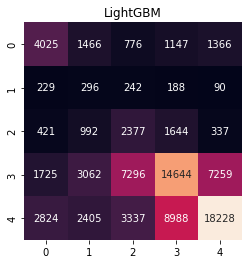

In [20]:
cm_lgbm = confusion_matrix(y_test, ypred_lgbm)
ax = plt.axes()
sns.heatmap(cm_lgbm.T, square=True, annot=True, fmt='d', cbar=False)
ax.set_title('LightGBM')
plt.show

In [54]:
[x for x in fe.rf if x not in lgbm_df.sort_values(by='lgbm_feature_importance',ascending=False).head(50).feature.tolist()]

['WiFi_free',
 'RestaurantsDelivery_True',
 'RestaurantsDelivery_False',
 'WiFi_no',
 'Restaurants',
 'OutdoorSeating_False',
 'Caters_False',
 'NoiseLevel_average',
 'RestaurantsTableService_True',
 'OutdoorSeating_True',
 'divey_False',
 'BikeParking_True',
 'RestaurantsPriceRange2_2.0',
 'lot_False',
 'RestaurantsReservations_False',
 'RestaurantsReservations_True',
 'Caters_True',
 'Alcohol_no',
 'lunch_True',
 'lot_True',
 'Alcohol_beer_and_wine',
 'HasTV_False',
 'HasTV_True',
 'street_True',
 'brunch_False',
 'WheelchairAccessible_True',
 'Alcohol_full_bar',
 'DogsAllowed_False',
 'stars']

In [55]:
[x for x in lgbm_df.sort_values(by='lgbm_feature_importance',ascending=False).head(50).feature.tolist() if x not in fe.rf]

['new_user_id',
 'user_review_count',
 'yelping_since_day',
 'useful',
 'date_day',
 'new_business_id',
 'latitude',
 'longitude',
 'review_count',
 'funny',
 'cool',
 'yelping_since_month',
 'date_month',
 'date_year',
 'yelping_since_year',
 'yelping_since_weekday',
 'date_weekday',
 'business_stars',
 'Alcohol',
 'RestaurantsPriceRange2',
 'Caters',
 'WiFi',
 'RestaurantsDelivery',
 'OutdoorSeating',
 'lunch',
 'HasTV',
 'RestaurantsTableService',
 'RestaurantsReservations',
 'dinner',
 'classy',
 'casual',
 'lot',
 'brunch',
 'HappyHour',
 'BikeParking',
 'street',
 'RestaurantsGoodForGroups',
 'latenight',
 'WheelchairAccessible',
 'GoodForKids',
 ' Restaurants',
 'trendy',
 'DogsAllowed',
 'breakfast',
 'dessert',
 'is_open',
 'is_elite',
 ' Food',
 'hipster',
 'garage']

In [65]:
lgbm.num_trees()

5750

In [45]:
lgbm_df = pd.DataFrame(lgbm.feature_importance(),columns=['lgbm_feature_importance'])
lgbm_df['feature'] = x.columns

In [52]:
lgbm_df.sort_values(by='lgbm_feature_importance',ascending=False).head(50).feature

654                 new_user_id
650           user_review_count
658           yelping_since_day
651                      useful
662                    date_day
649             new_business_id
0                      latitude
1                     longitude
3                  review_count
652                       funny
653                        cool
657         yelping_since_month
661                  date_month
660                   date_year
656          yelping_since_year
659       yelping_since_weekday
663                date_weekday
2                business_stars
17                      Alcohol
15       RestaurantsPriceRange2
11                       Caters
6                          WiFi
22          RestaurantsDelivery
12               OutdoorSeating
42                        lunch
16                        HasTV
5       RestaurantsTableService
9       RestaurantsReservations
40                       dinner
30                       classy
29                       casual
25      

In [ ]:
# fig, ax = plt.subplots(figsize=(25, 100))
# lgb.plot_tree(lgbm,'multi_logloss', train_data, figsize=(25, 100))
# plt.show()

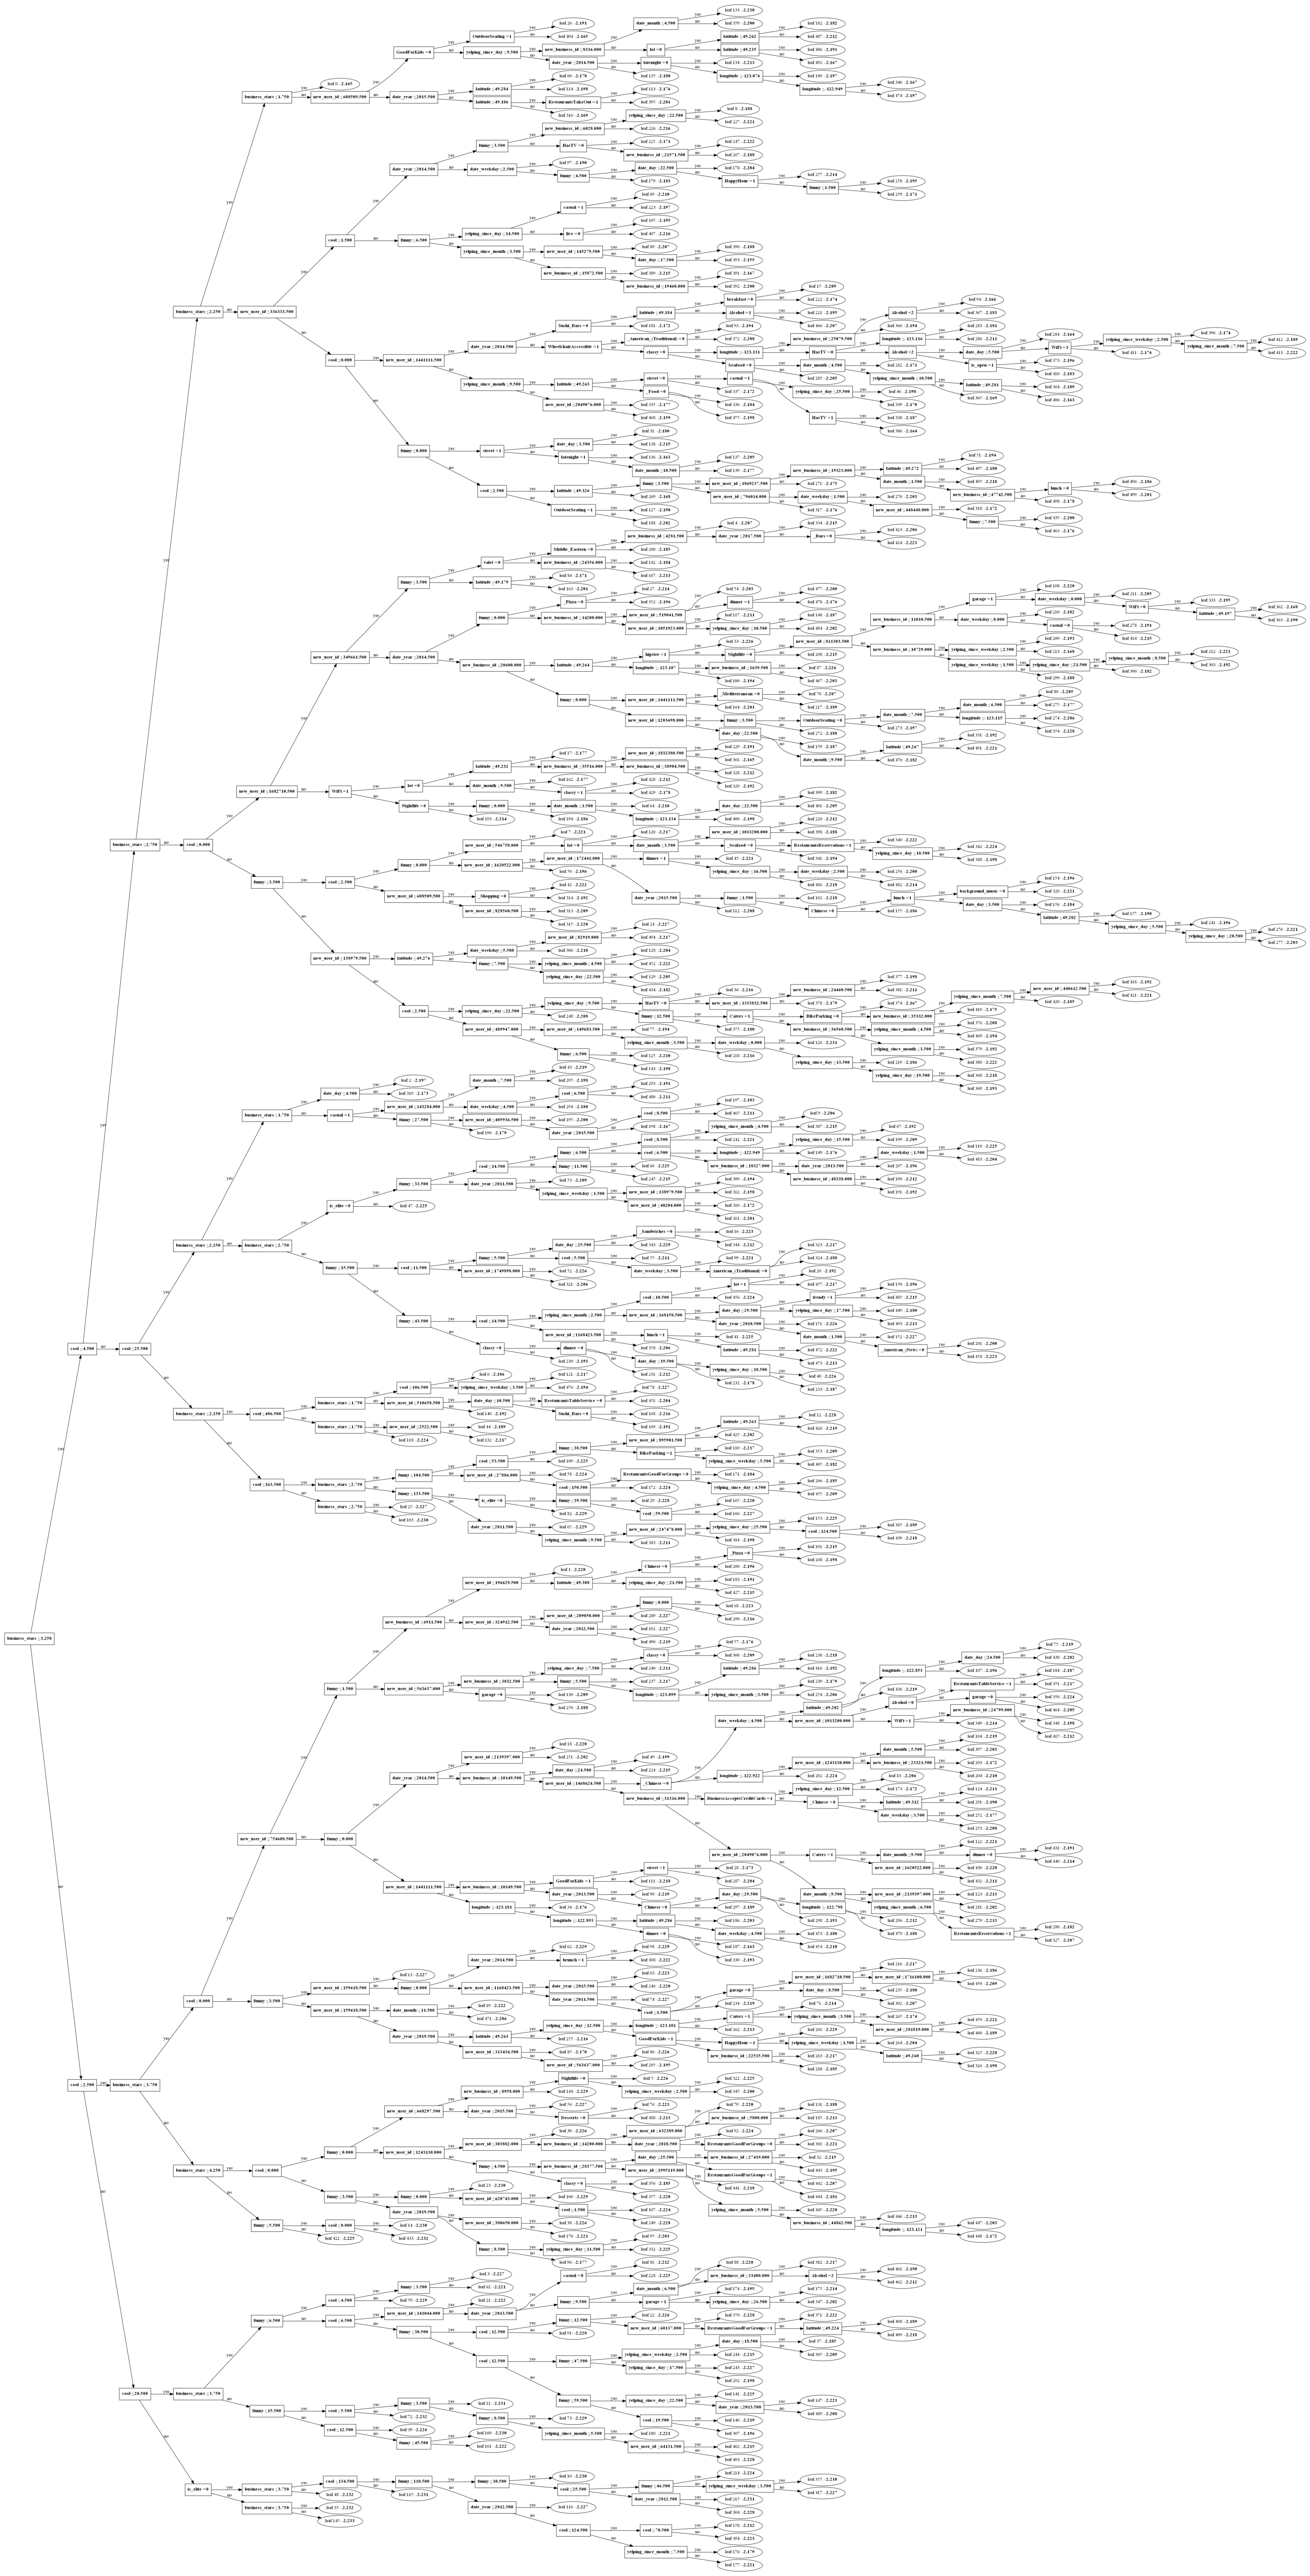

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(100, 100))
lgb.plot_tree(lgbm, ax=ax, dpi=120)
plt.show()

In [27]:
import shap

In [28]:
shap.initjs()

In [29]:
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(x)

In [37]:
shap_values

[array([[-6.73150574e-05,  0.00000000e+00,  1.07867869e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.02893744e-05,  0.00000000e+00, -2.59122313e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.02893744e-05,  0.00000000e+00, -3.12609583e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 6.12351857e-04,  0.00000000e+00,  8.11997025e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.02893744e-05,  0.00000000e+00, -2.53231974e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.02893744e-05,  0.00000000e+00, -2.34255814e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 array([[ 1.14725469e-02, -6.63019298e-04,  1.12179295e-01, ...,
         -3.94332054e-04, -3.39878630e-05, -2.63204255e-05],
        [ 4.27239892e-03,  1.13677699e-03, -2.06040836e-01, ...,
         -1.43188315e-04,  6.53263232e

In [38]:
i = 1
shap.force_plot(explainer.expected_value[0], shap_values[[i]], features=x.iloc[[i]], feature_names=x.columns)

TypeError: list indices must be integers or slices, not list

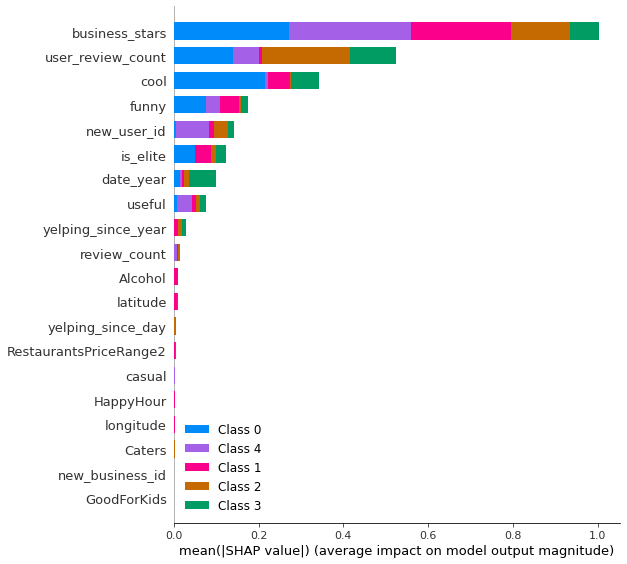

In [32]:
shap.summary_plot(shap_values, features=x, feature_names=x.columns)

## Light GBM(Regression)

In [204]:
train_data=lgb.Dataset(x_train,label=y_train)

In [183]:
x_train['business_id'].nunique()/x_train.shape[0]

KeyError: 'business_id'

In [205]:
param = {'objective': 'regression', 'learning_rate': 0.05,
         'feature_fraction': 0.9,
         #'bagging_fraction': 0.7,
         #'bagging_freq': 10,
         'verbose': 0,
         'num_leaves': 256,
         # 'force_col_wise':True
        }
param['metric'] = ['l1', 'l2']

In [206]:
num_round=2000

In [207]:
start=datetime.now()
lgbm=lgb.train(param,train_data,num_round)
stop=datetime.now()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.197520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [208]:
ypred_lgbm=lgbm.predict(x_test)

In [209]:
ypred_lgbm

array([3.1393914 , 1.7625055 , 3.25044178, ..., 2.98326023, 3.17938417,
       2.41369198])

In [210]:
ypred_lgbm.max()

4.543833571782283

In [211]:
ypred_lgbm = ypred_lgbm.round().astype('int')

-1

In [192]:
# ypred_lgbm[(min_pred+pred_interval)>ypred_lgbm] =0
# ypred_lgbm[((min_pred+pred_interval)<=ypred_lgbm) & (ypred_lgbm<(min_pred+pred_interval*2))] =1
# ypred_lgbm[((min_pred+pred_interval*2)<=ypred_lgbm) & (ypred_lgbm<(min_pred+pred_interval*3))] =2
# ypred_lgbm[((min_pred+pred_interval*3)<=ypred_lgbm) & (ypred_lgbm<(min_pred+pred_interval*4))] =3
# ypred_lgbm[(min_pred+pred_interval*4)<=ypred_lgbm] =4

NameError: name 'min_pred' is not defined

In [214]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
print(confusion_matrix(y_test, ypred_lgbm))
print(balanced_accuracy_score(y_test, ypred_lgbm))

[[    0     0     0     0     0     0     0]
 [    7   475  2407  3883  2248   106     0]
 [    2    83   933  3972  3153   113     0]
 [    0    18   634  5851  7158   288     0]
 [    0    20   536  6989 17767  1208     0]
 [    0    28   539  4461 18646  3838     1]
 [    0     0     0     0     0     0     0]]
0.27879186099289677


y_pred contains classes not in y_true


## xgboost

In [30]:
xn_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213871 entries, 4438097 to 3825792
Columns: 653 entries, latitude to is_elite
dtypes: category(645), float64(3), int64(5)
memory usage: 146.3 MB


In [19]:
import xgboost as xgb
print(xgb.__version__)

1.5.0


In [31]:
xn = df_nostr.drop(columns='stars')
yn = df_nostr.stars

In [35]:
def downcast_cat(df):
    # downcast integer and float reduced space.
    cat_cols = list(df.select_dtypes(include=['category']).columns.values)
    df.loc[:, cat_cols] = df.loc[:, cat_cols].apply(pd.to_numeric, downcast='integer')


In [36]:
downcast_cat(xn)


In [39]:
yn = yn.astype(int)

In [43]:
yn.dtype

dtype('int32')

In [44]:
from sklearn.model_selection import train_test_split 
xn_train,xn_test,yn_train,yn_test=train_test_split(xn,yn,test_size=.3)

In [63]:
dtrain = xgb.DMatrix(xn_train, label=yn_train)
params = {'max_depth': 20}
num_round = 100
bst = xgb.train(params, dtrain, num_round)

In [91]:
dtest = xgb.DMatrix(xn_test, label=yn_test)
ypred_xgb = bst.predict(dtest)

In [99]:
min_pred = ypred_xgb.min()-0.01
max_pred = ypred_xgb.max()
pred_interval = (max_pred-min_pred)/5

In [100]:
pred_interval

1.2147440810203551

In [101]:
xgb_result = [np.ceil((elm-min_pred)/pred_interval) for elm in ypred_xgb]

In [102]:
np.ceil(0)

0.0

In [103]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
print(confusion_matrix(yn_test, xgb_result))
print(balanced_accuracy_score(yn_test, xgb_result))

[[   43  1528  3039  3448   813]
 [   16   649  2747  4458   875]
 [    4   445  3620  9113  1709]
 [    8   572  4647 18090  5215]
 [   13   606  3683 16375  9944]]
0.25618607228200374


In [68]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 100))
xgb.plot_tree(bst, ax=ax)
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.075895 to fit


## Naive Bayes

In [77]:
yelp = yelp[fe.rf.tolist()]

In [78]:
yelp = yelp.drop(columns=['longitude', 'latitude'])

In [79]:
yelp = yelp.drop(columns=['new_business_id', 'new_user_id'])

In [80]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426820 entries, 16 to 8635383
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   user_review_count              426820 non-null  int64   
 1   useful                         426820 non-null  int64   
 2   date_day                       426820 non-null  int64   
 3   yelping_since_day              426820 non-null  int64   
 4   cool                           426820 non-null  int64   
 5   date_month                     426820 non-null  int64   
 6   funny                          426820 non-null  int64   
 7   yelping_since_month            426820 non-null  int64   
 8   yelping_since_year             426820 non-null  int64   
 9   date_year                      426820 non-null  int64   
 10  date_weekday                   426820 non-null  int64   
 11  yelping_since_weekday          426820 non-null  int64   
 12  business_stars

In [81]:
xn = yelp.drop(columns='stars')
yn = yelp.stars

In [82]:
from sklearn.model_selection import train_test_split 
xn_train,xn_test,yn_train,yn_test=train_test_split(xn,yn,test_size=.2)

In [83]:
xn_train.head()

user_review_count  useful  date_day  yelping_since_day  cool  \
3188265                 10       6        25                 11     0   
3178681                165      95        21                  4    31   
861656                1492     546         5                 20   345   
1240469                123     236        23                 16    70   
6623491                  1       1         6                  8     0   

         date_month  funny  yelping_since_month  yelping_since_year  \
3188265           9      2                   11                2011   
3178681          11     13                    7                2015   
861656            3    102                    9                2016   
1240469           5     57                    6                2005   
6623491           7      0                    9                2016   

         date_year  ...  lunch_True  lot_True  Alcohol_beer_and_wine  \
3188265       2018  ...           0         1                      1   
3178681       2020  ...           0         0                      0   
861656        2020  ...           1         1                      0   
1240469       2011  ...           1         0                      0   
6623491       2017  ...           1         1                      1   

         HasTV_False HasTV_True street_True brunch_False  \
3188265            0          1           1            1   
3178681            1          0           1            1   
861656             0          1           0            0   
1240469            0          1           1            1   
6623491            1          0           0            1   

        WheelchairAccessible_True Alcohol_full_bar DogsAllowed_False  
3188265                         0                0                 0  
3178681                         1                0                 1  
861656                          0                1                 0  
1240469                         0                1                 0  
6623491                         0                0                 0  

[5 rows x 46 columns]

In [84]:
yn.unique()

array([5, 1, 3, 4, 2], dtype=int64)

In [85]:
from sklearn.naive_bayes import GaussianNB
start=datetime.now()
gnb = GaussianNB().fit(xn_train, yn_train)
end=datetime.now()
ypred_gnb = gnb.predict(xn_test)
fit_time = end-start

accuracy for baive bayes: 0.2779860362682161
[[ 7535   200   108   157  1262]
 [ 5204   459   408   578  1679]
 [ 6567   891  1165  1838  3408]
 [12302   874  1266  3466  8550]
 [14094   232   476  1540 11105]]
Fitting time: 0:00:00.820711


<function matplotlib.pyplot.show(close=None, block=None)>

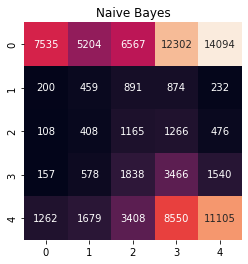

In [88]:
# accuracy on X_test
accuracy = gnb.score(xn_test, yn_test)
print(f"accuracy for baive bayes: {accuracy}")
 
# creating a confusion matrix
cm_nb = confusion_matrix(yn_test, ypred_gnb)
print(cm_nb)
print(f"Fitting time: {fit_time}")
ax = plt.axes()
sns.heatmap(cm_nb.T, square=True, annot=True, fmt='d', cbar=False)
ax.set_title('Naive Bayes')
plt.show

## KNN

In [89]:
path = 'C:/Users/HEN1/Projects/YELP_DATASET/DATA'
file_name = 'yelp.pkl'
file = os.path.join(path, file_name)
with open(file, 'rb') as file:
    yelp=pickle.load(file)

In [94]:
yelp = yelp[fe.rf.tolist()]
yelp = yelp.drop(columns=['new_business_id', 'new_user_id'])

In [95]:
xn = yelp.drop(columns='stars')
yn = yelp.stars

In [96]:
from sklearn.model_selection import train_test_split 
xn_train,xn_test,yn_train,yn_test=train_test_split(xn,yn,test_size=.2)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(xn_train, yn_train)

C:\Users\HEN1\miniconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


accuracy for knn: 0.32722224825453355


C:\Users\HEN1\miniconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[ 7535   200   108   157  1262]
 [ 5204   459   408   578  1679]
 [ 6567   891  1165  1838  3408]
 [12302   874  1266  3466  8550]
 [14094   232   476  1540 11105]]
0:10:01.717285


<function matplotlib.pyplot.show(close=None, block=None)>

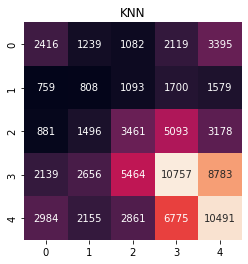

In [98]:

# accuracy on X_test
accuracy = knn.score(xn_test, yn_test)
print(f"accuracy for knn: {accuracy}")
 
start=datetime.now()
# creating a confusion matrix
knn_predictions = knn.predict(xn_test)
cm_knn = confusion_matrix(yn_test, knn_predictions)
print(cm_nb)
end=datetime.now()
duration = end-start
print(duration)
ax = plt.axes()
sns.heatmap(cm_knn.T, square=True, annot=True, fmt='d', cbar=False)
ax.set_title('KNN')
plt.show

### Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
xn = yelp.drop(columns='stars')
yn = yelp.stars

In [136]:
from sklearn.model_selection import train_test_split 
xn_train,xn_test,yn_train,yn_test=train_test_split(xn,yn,test_size=.2)

In [138]:
start=datetime.now()
rf_clf = RandomForestClassifier(n_estimators = 1000)
rf_clf.fit(xn_train,yn_train)
end=datetime.now()
duration = end-start

In [139]:
ypred_rf=rf_clf.predict(xn_test)

In [140]:
ypred_rf.max()

5

[[ 3105   418   614  2208  2937]
 [ 1009   423  1087  3164  2544]
 [  706   417  2418  6923  3553]
 [ 1043   407  2258 13438  9251]
 [ 1142   273   856  7696 17474]]
0.3408593363685702
Fitting time: 0:45:31.462518


<function matplotlib.pyplot.show(close=None, block=None)>

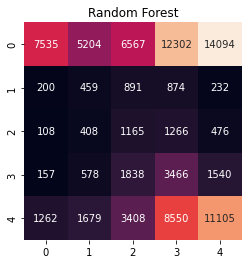

In [142]:
print(confusion_matrix(yn_test, ypred_rf))
print(balanced_accuracy_score(yn_test, ypred_rf))

print(f"Fitting time: {duration}")
ax = plt.axes()
sns.heatmap(cm_nb.T, square=True, annot=True, fmt='d', cbar=False)
ax.set_title('Random Forest')
plt.show

In [160]:
tree_0 = rf_clf.estimators_[0]

In [165]:
from sklearn.tree import export_graphviz
# Export as dot file
plot_name = 'rf_tree.dot'
out_plot=os.path.join(path, plot_name)
export_graphviz(tree_0, 
                out_file=plot_name, 
                feature_names = xn.columns.tolist(),
                class_names = ['1', '2', '3', '4', '5'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [185]:
import pydot

(graph,) = pydot.graph_from_dot_file(out_plot)
png_name = 're_tree.png'
out_png=os.path.join(path, png_name)
graph.write_png(out_png)

"dot" with args ['-Tpng', 'C:\\Users\\HEN1\\AppData\\Local\\Temp\\tmp98w2p4kd'] returned code: 3221225477

stdout, stderr:
 b''
b'out of memory\r\n'



AssertionError: 3221225477

In [183]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = out_png)

FileNotFoundError: [Errno 2] No such file or directory: 'rf_tree.png'

In [157]:
rf_clf.feature_importances_

array([1.45608655e-02, 1.42067695e-02, 2.35991454e-02, 1.49334050e-02,
       2.97793099e-03, 4.24373615e-06, 1.58995105e-06, 4.93816434e-05,
       1.39900438e-06, 6.67064775e-07, 1.19921440e-05, 5.14892322e-05,
       2.02454630e-04, 5.19970874e-07, 2.33510791e-06, 8.01445256e-04,
       1.02472299e-03, 1.67189694e-06, 1.67291072e-06, 2.28145006e-05,
       3.55748406e-05, 1.94770951e-05, 2.26876074e-05, 3.51744710e-06,
       3.71096477e-06, 2.61721481e-04, 1.06893788e-03, 2.50297345e-05,
       1.31361791e-05, 7.50545672e-07, 1.60427479e-05, 2.75053636e-06,
       2.23421993e-06, 1.07945357e-04, 7.87808054e-04, 6.11742697e-04,
       8.96269975e-07, 1.19269541e-03, 1.77894675e-06, 1.99888513e-05,
       1.98506602e-06, 2.24576316e-05, 5.15923976e-06, 3.92149308e-04,
       1.19770901e-04, 3.90464483e-06, 1.20307670e-04, 4.74101535e-07,
       6.82528824e-06, 1.83022499e-04, 5.19636388e-06, 4.38642446e-06,
       4.46153889e-06, 5.88015569e-06, 4.58415432e-05, 5.59978365e-05,
      

In [158]:
feature_importance = rf_clf.feature_importances_
rf_df = pd.DataFrame(feature_importance,columns=['rf_feature_importance'])
rf_df['feature'] = xn.columns
rf_df.sort_values(by='rf_feature_importance',ascending=False).head(50)

rf_feature_importance                        feature
707               0.062168                    new_user_id
703               0.061072              user_review_count
704               0.055871                         useful
715               0.054296                       date_day
711               0.052131              yelping_since_day
706               0.049704                           cool
705               0.048629                          funny
714               0.048171                     date_month
710               0.046613            yelping_since_month
709               0.043470             yelping_since_year
713               0.043147                      date_year
716               0.042818                   date_weekday
712               0.041239          yelping_since_weekday
2                 0.023599                 business_stars
3                 0.014933                   review_count
0                 0.014561                       latitude
1                 0.014207                      longitude
606               0.014058                new_business_id
708               0.008686                       is_elite
686               0.003583                      WiFi_free
632               0.003508       RestaurantsDelivery_True
687               0.003470                        WiFi_no
631               0.003468      RestaurantsDelivery_False
559               0.003398                    Restaurants
290               0.003390                    Restaurants
619               0.003345           OutdoorSeating_False
617               0.003242                   Caters_False
608               0.003193   RestaurantsTableService_True
692               0.003179             NoiseLevel_average
620               0.003175            OutdoorSeating_True
647               0.003138                    divey_False
700               0.003032     RestaurantsPriceRange2_2.0
613               0.003004  RestaurantsReservations_False
610               0.002979               BikeParking_True
4                 0.002978                        is_open
614               0.002962   RestaurantsReservations_True
618               0.002937                    Caters_True
635               0.002906                      lot_False
149               0.002903                           Food
691               0.002848                     Alcohol_no
626               0.002758                     HasTV_True
689               0.002751          Alcohol_beer_and_wine
671               0.002740                     lunch_True
636               0.002684                       lot_True
625               0.002649                    HasTV_False
662               0.002636                   brunch_False
690               0.002597               Alcohol_full_bar
616               0.002571      WheelchairAccessible_True
627               0.002558              DogsAllowed_False
638               0.002550                    street_True